# 📈 ПРОЕКТ 📊

# 🔍 МОДЕЛЬ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ 🔎

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных объединённого датафрейма</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей-машинного-обучения" data-toc-modified-id="Обучение-моделей-машинного-обучения-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей машинного обучения</a></span></li><li><span><a href="#Проверка-лучшей-модели" data-toc-modified-id="Проверка-лучшей-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка лучшей модели</a></span></li><li><span><a href="#Общий-вывод-и-рекомендации-заказчику" data-toc-modified-id="Общий-вывод-и-рекомендации-заказчику-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод и рекомендации заказчику</a></span></li></ul></div>

## Загрузка данных

<div style="border:solid green 2px; padding: 5px">
    
    загружаем актуальную версию scikit-learn и phik:

In [1]:
!pip install --upgrade -qq pip

!pip install --upgrade -qq scikit-learn

!pip install phik -qq

<div style="border:solid green 2px; padding: 5px">
    
    проверяем, что версия sklearn обновилась до последней:

In [2]:
import sklearn
print(sklearn.__version__)

1.5.1


<div style="border:solid green 2px; padding: 5px">
    
    импортируем библиотеки, необходимые нам в работе, также фиксируем RS, заданный нам ментором:


In [3]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from phik import phik_matrix

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, roc_auc_score, accuracy_score, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

RANDOM_STATE = 60524

## Исследовательский анализ и предобработка данных

<div style="border:solid green 2px; padding: 5px">
    
    подгружаем первый файл (contract_new.csv), 
    сохраняем в переменную и выводим в виде таблиц и детализированных отчётов для изучения:


In [4]:
contract = pd.read_csv('/datasets/contract_new.csv')

contract.info()
print()
print(contract.describe())
print()
display(contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<div style="border:solid green 2px; padding: 5px">
    
    из первого, что бросается в глаза, видим отсутствие пропусков, неверное указание типа данных 
    в столбцах BeginDate и TotalCharges, также для удобства приведём названия столбцов в "змеиный" формат
    
    подгружаем второй файл (personal_new.csv), 
    сохраняем в переменную и выводим в виде таблиц и детализированных отчётов для изучения:

In [5]:
personal = pd.read_csv('/datasets/personal_new.csv')

personal.info()
print()
print(personal.describe())
print()
display(personal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<div style="border:solid green 2px; padding: 5px">
    
    во втором файле ничего требующего капитального ремонта в глаза не бросается, 
    разве что косметический ремонт в названиях столбцов
    
    подгружаем третий файл (internet_new.csv), 
    сохраняем в переменную и выводим в виде таблиц и детализированных отчётов для изучения:

In [6]:
internet = pd.read_csv('/datasets/internet_new.csv')

internet.info()
print()
print(internet.describe())
print()
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     9470-YFUYI     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMov

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<div style="border:solid green 2px; padding: 5px">
    
    в третьем файле количество строк (абонентов) отличается (5517 из 7043), 
    видимо это то количество пользователей,     которые используют интернет
    
    подгружаем последний файл (phone_new.csv), 
    сохраняем в переменную и выводим в виде таблиц и детализированных отчётов для изучения:

In [7]:
phone = pd.read_csv('/datasets/phone_new.csv')

phone.info()
print()
print(phone.describe())
print()
display(phone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

        customerID MultipleLines
count         6361          6361
unique        6361             2
top     6479-SZPLM            No
freq             1          3390



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div style="border:solid green 2px; padding: 5px">
    
    в последнем файле 6361 строк, теперь приступим к предобработке данных:

In [8]:
unique_total_charges = contract['TotalCharges'].unique()
print(np.sort(unique_total_charges))

[' ' '100.17' '100.19' ... '998.89' '999.6' '999.9']


<div style="border:solid green 2px; padding: 5px">
    
    в столбце видим пустые строки ' ', которые система не выдавала как пустые, 
    но при этом не давала нам поменять тип данных на нужный, 
    поменяем их на пустые строки, изменим тип данных и посчитаем:
    

In [9]:
contract['TotalCharges'] = contract['TotalCharges'].replace(' ', np.nan).astype(float)
print(contract['TotalCharges'].isna().sum())

11


<div style="border:solid green 2px; padding: 5px">
    
    11 штук, немного, выведем строки с ними:
    

In [10]:
contract_nan = contract[contract.isnull().any(axis=1)]
display(contract_nan)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


<div style="border:solid green 2px; padding: 5px">
    
    ага, видим, что это абоненты, которые оформили контракт 2020-02-01 (новые абоненты),
    посмотрим на минимальные и максимальные даты заключения контрактов:

In [11]:
print(contract['BeginDate'].min())
print(contract['BeginDate'].max())

2013-10-01
2020-02-01


<div style="border:solid green 2px; padding: 5px">
    
    теперь ясно, ошибки нет, это самые последние абоненты, 
    у которых по алгоритму данные за отчётный период ещё не прогрузились;
    запишем их текущие (месячные) траты в общие траты, чтобы убрать пропуски и сразу проверим:

In [12]:
contract['TotalCharges'].fillna(contract['MonthlyCharges'], inplace=True)
print(contract['TotalCharges'].isna().sum())

0


<div style="border:solid green 2px; padding: 5px">
    
    всё получилось; изменяем тип данных на датах, проверяем результат:

In [13]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


<div style="border:solid green 2px; padding: 5px">
    
    займёмся названиями столбцов и приведём их к змеиному формату, попутно проверяя результат:

In [14]:
contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [15]:
contract.columns = ['customer_id', 'begin_date','end_date', 'type', 'paperless_billing', 
                    'payment_method', 'monthly_charges', 'total_charges']
display(contract.head())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50


In [16]:
personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [17]:
personal.columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']
display(personal.head())

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [18]:
internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [19]:
internet.columns = ['customer_id', 'internet_service', 'online_security', 'online_backup',
                    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
display(internet.head())

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [20]:
phone.columns

Index(['customerID', 'MultipleLines'], dtype='object')

In [21]:
phone.columns = ['customer_id', 'multiple_lines']
display(phone.head())

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div style="border:solid green 2px; padding: 5px">
    
    к таблицам пользователей интернета и телефона добавим столбец с цифрами 1, что будет указывать, 
    что конкретный customer_id является пользователем телефона либо интернета либо обеими услугами одновременно,
    данный способ может помочь модели машинного обучения повысить качество прогнозирования:

In [22]:
internet['internet_user'] = 1
phone['phone_user'] = 1

display(internet.head())
display(phone.head())

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_user
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,1
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,1
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,1
4,9237-HQITU,Fiber optic,No,No,No,No,No,No,1


,customer_id,multiple_lines,phone_user
0,5575-GNVDE,No,1
1,3668-QPYBK,No,1
2,9237-HQITU,No,1
3,9305-CDSKC,Yes,1
4,1452-KIOVK,Yes,1


<div style="border:solid green 2px; padding: 5px">
    
    создадим функцию, чтобы просмотреть уникальные отсортированные значения всех столбцов каждого файла:

In [23]:
def rows(data):
    for column in data.columns:
        print('Уникальные значения столбца', column)
        print(data[column].sort_values().unique())

In [24]:
rows(contract)

Уникальные значения столбца customer_id
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Уникальные значения столбца begin_date
['2013-10-01T00:00:00.000000000' '2013-11-01T00:00:00.000000000'
 '2013-12-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2014-04-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2014-06-01T00:00:00.000000000' '2014-07-01T00:00:00.000000000'
 '2014-08-01T00:00:00.000000000' '2014-09-01T00:00:00.000000000'
 '2014-10-01T00:00:00.000000000' '2014-11-01T00:00:00.000000000'
 '2014-12-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2015-02-01T00:00:00.000000000' '2015-03-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-05-01T00:00:00.000000000'
 '2015-06-01T00:00:00.000000000' '2015-07-01T00:00:00.000000000'
 '2015-08-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2015-10-01T00:00:00.000000000' '2015-11-01T00:00:00.00

<div style="border:solid green 2px; padding: 5px">
    
    видим, что конец контракта (end_date) обозначается датами, 
    для модели МО будет понятнее указание факта разрыва вместо даты ('Yes','No' или '1' и '0'),
    остальные значения столбцов подозрений не вызывают
    
    удалять столбец не будем, создадим новый 'is_exited' со значениями 0 и 1, 
    проверяем и смотрим уникальные значения следующих файлов:

In [25]:
contract['is_exited'] = contract['end_date'].apply(lambda x: 0 if x == 'No' else 1)
display(contract.head())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,is_exited
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0


In [26]:
rows(personal)

Уникальные значения столбца customer_id
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Уникальные значения столбца gender
['Female' 'Male']
Уникальные значения столбца senior_citizen
[0 1]
Уникальные значения столбца partner
['No' 'Yes']
Уникальные значения столбца dependents
['No' 'Yes']


In [27]:
rows(internet)

Уникальные значения столбца customer_id
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Уникальные значения столбца internet_service
['DSL' 'Fiber optic']
Уникальные значения столбца online_security
['No' 'Yes']
Уникальные значения столбца online_backup
['No' 'Yes']
Уникальные значения столбца device_protection
['No' 'Yes']
Уникальные значения столбца tech_support
['No' 'Yes']
Уникальные значения столбца streaming_tv
['No' 'Yes']
Уникальные значения столбца streaming_movies
['No' 'Yes']
Уникальные значения столбца internet_user
[1]


In [28]:
rows(phone)

Уникальные значения столбца customer_id
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-RRAMN' '9992-UJOEL'
 '9993-LHIEB']
Уникальные значения столбца multiple_lines
['No' 'Yes']
Уникальные значения столбца phone_user
[1]


<div style="border:solid green 2px; padding: 5px">
    
    уникальные значения вопросов не вызывают, ошибок нет;
    проверим отсутствие дубликатов в customer_id во всех файлах при помощи функции:
    

In [29]:
def duplicates(df, name):
    if df['customer_id'].duplicated().any():
        print(f'ЕСТЬ дубликаты в столбце customer_id в файле {name}')
    else:
        print(f'Дубликатов в столбце customer_id в файле {name} НЕ обнаружено')

datasets = {'contract': contract, 'personal': personal, 'internet': internet, 'phone': phone}

for name, df in datasets.items():
    duplicates(df, name)

Дубликатов в столбце customer_id в файле contract НЕ обнаружено
Дубликатов в столбце customer_id в файле personal НЕ обнаружено
Дубликатов в столбце customer_id в файле internet НЕ обнаружено
Дубликатов в столбце customer_id в файле phone НЕ обнаружено


<div style="border:solid green 2px; padding: 5px">
    
    дубликаты отсутствуют, файлы приведены в порядок

<div style="border:solid green 3px; padding: 15px"> 
    
# Промежуточный вывод:
    
1. подгрузили необходимые библиотеки;
2. изучили файлы, скорректировали типы данных;
3. привели названия столбцов в змеиный формат;
4. проанализировали уникальные значения, проверили на дубликаты;
5. добавили 3 столбца, которые могут помочь модели в прогнозировании.


## Объединение данных

<div style="border:solid green 2px; padding: 5px">
    
    объединим предобработанные данные в один файл, проверим результат:

In [30]:
data = contract.merge(personal, on='customer_id', how='left')
data = data.merge(internet, on='customer_id', how='left')
data = data.merge(phone, on='customer_id', how='left')

display(data.head())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,is_exited,gender,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_user,multiple_lines,phone_user
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,DSL,No,Yes,No,No,No,No,1.0,NaN,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0,Male,...,DSL,Yes,No,Yes,No,No,No,1.0,No,1.0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,DSL,Yes,Yes,No,No,No,No,1.0,No,1.0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,DSL,Yes,No,Yes,Yes,No,No,1.0,NaN,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,Fiber optic,No,No,No,No,No,No,1.0,No,1.0


## Исследовательский анализ и предобработка данных объединённого датафрейма

<div style="border:solid green 2px; padding: 5px">
    
    при помощи лямбда-функции заполним нулями internet_user и phone_user тех пользователей, 
    кто не является пользователем конкретной услуги, сразу проверим результат:

In [31]:
data['internet_user'] = data['streaming_movies'].apply(lambda x: 0 if pd.isnull(x) else 1)
data['phone_user'] = data['multiple_lines'].apply(lambda x: 0 if pd.isnull(x) else 1)

display(data.head())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,is_exited,gender,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_user,multiple_lines,phone_user
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,DSL,No,Yes,No,No,No,No,1,NaN,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0,Male,...,DSL,Yes,No,Yes,No,No,No,1,No,1
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,DSL,Yes,Yes,No,No,No,No,1,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,DSL,Yes,No,Yes,Yes,No,No,1,NaN,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,Fiber optic,No,No,No,No,No,No,1,No,1


<div style="border:solid green 2px; padding: 5px">
    
    заполним пустые строки после объединения "заглушкой" и проверим результат:

In [32]:
data.fillna('N/D', inplace=True)
data.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
is_exited            0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
internet_user        0
multiple_lines       0
phone_user           0
dtype: int64

<div style="border:solid green 2px; padding: 5px">
    
    создадим новый столбец с продолжительностью контракта, для активных абонентов выберем дату условно 2020-02-15
    как текущую, чтобы корректно рассчитать продолжительность всех без исключения абонентов:

In [33]:
data['end_date'] = data['end_date'].replace('No', '2020-02-01')
data['end_date'] = pd.to_datetime(data['end_date'])
data['contract_duration'] = (data['end_date'] - data['begin_date']).dt.days
display(data.head())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,is_exited,gender,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_user,multiple_lines,phone_user,contract_duration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,No,Yes,No,No,No,No,1,N/D,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,...,Yes,No,Yes,No,No,No,1,No,1,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,Yes,Yes,No,No,No,No,1,No,1,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,Yes,No,Yes,Yes,No,No,1,N/D,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,No,No,No,No,No,No,1,No,1,153


<div style="border:solid green 2px; padding: 5px">
    
    можно посмотреть, есть ли у нас пользователи, которые вообще не используют никаких услуг:

In [34]:
data_no_serv = len(data[(data['internet_user'] == 0) & (data['phone_user'] == 0)])
print(f"Количество строк с 'internet_user' и 'phone_user' равными 0 одновременно: {data_no_serv}")

Количество строк с 'internet_user' и 'phone_user' равными 0 одновременно: 0


<div style="border:solid green 2px; padding: 5px">
    
    "пустых" пользователей нет, это означает, что модель не будет обучаться на пустых данных,
    что могло бы снизить качество прогнозирования
    
    переведём тип данных на object на неколичественных признаках, выведем info для проверки:

In [35]:
data['phone_user'] = data['phone_user'].astype(object)
data['internet_user'] = data['internet_user'].astype(object)
data['senior_citizen'] = data['senior_citizen'].astype(object)
data['is_exited'] = data['is_exited'].astype(object)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   is_exited          7043 non-null   object        
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   object        
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

<div style="border:solid green 2px; padding: 5px">
    
    построим графики по распределению категориальных признаков:

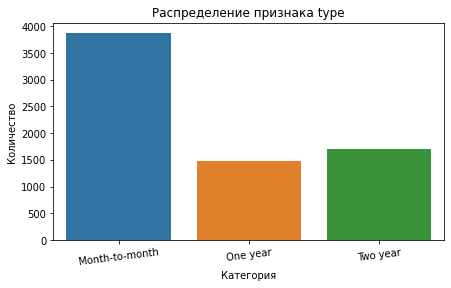

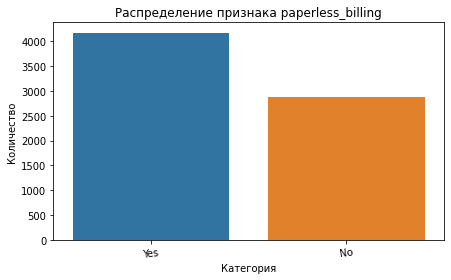

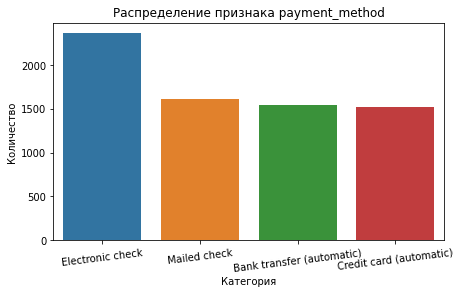

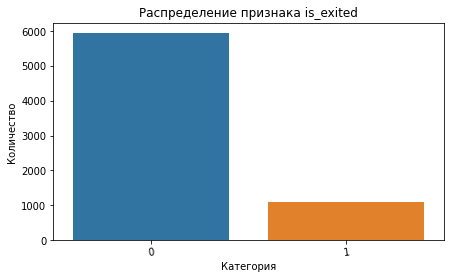

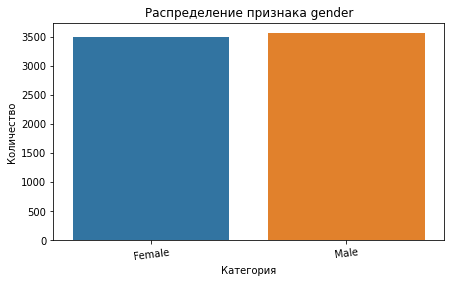

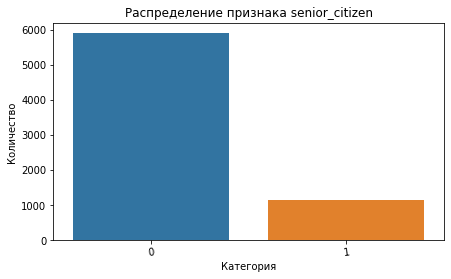

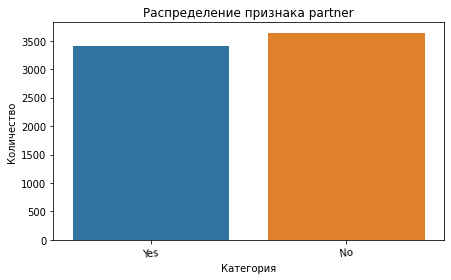

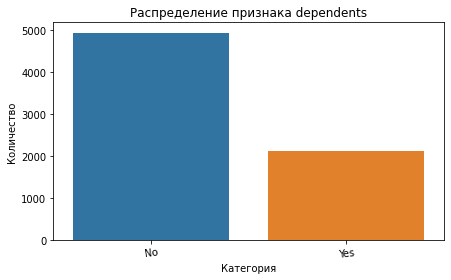

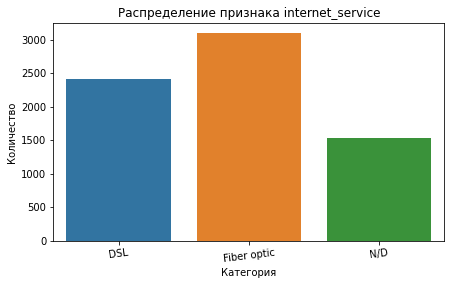

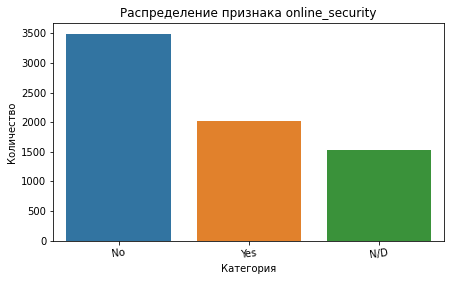

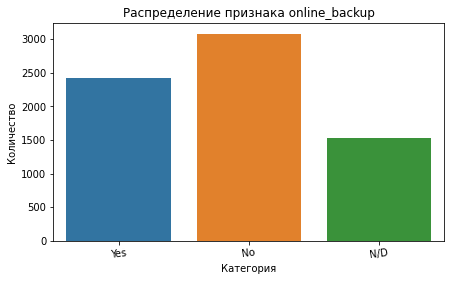

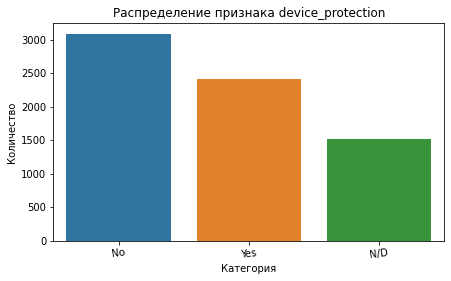

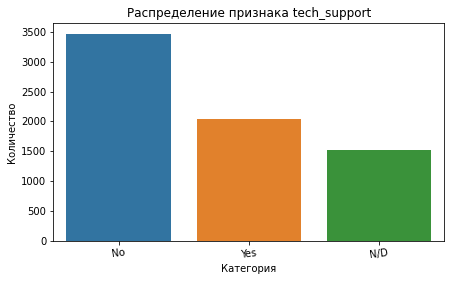

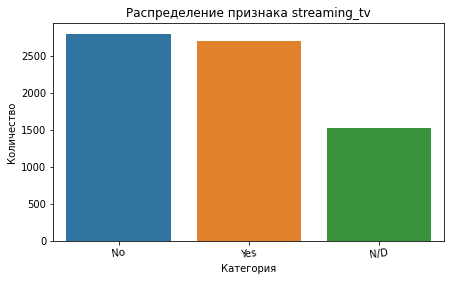

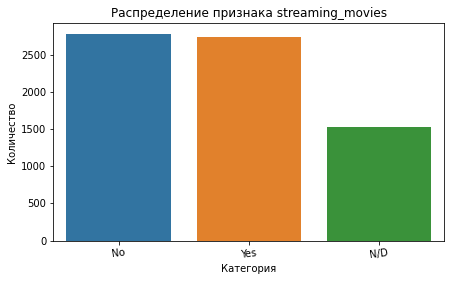

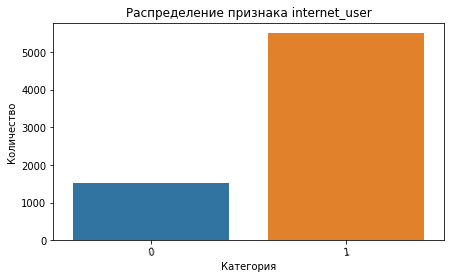

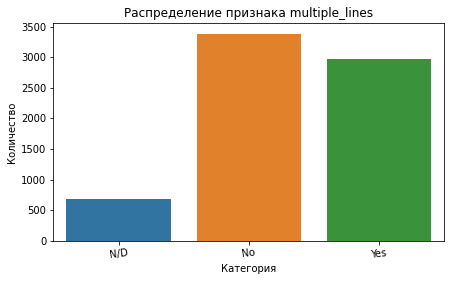

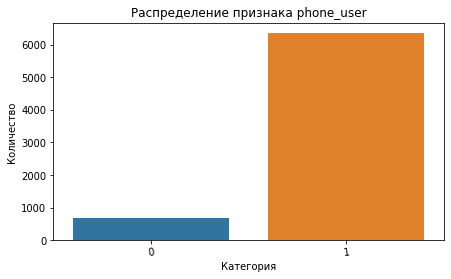

In [36]:
def countplot(data, x, title):
    plt.figure(figsize=(7, 4))
    sns.countplot(x=x, data=data)
    plt.title(title)
    plt.xlabel('Категория')
    plt.ylabel('Количество')
    plt.xticks(rotation=7)
    plt.show()

categorical_features = ['type', 'paperless_billing', 'payment_method', 'is_exited', 'gender','senior_citizen', 
                        'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 
                        'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'internet_user', 
                        'multiple_lines', 'phone_user']

for feature in categorical_features:
    countplot(data, feature, f'Распределение признака {feature}')

<div style="border:solid green 2px; padding: 5px">
    
    видим, что расторгнувших контракт стремится к соотношению 1 к 6, не пользующихся услугой интернета - чуть меньше, чем 1 к 4, а не испольующих телефонные услуги - и вовсе 1 к 10
    
    также видим популярность типа оплаты month-to-month, предпочтение к оплате paperless_billing, соответственно
    популярный метод оплаты electronic check, равенство по половому признаку и наличию супруга, по подключение услуг
    streaming_tv и streaming_movies, соотношение 1 к 6 пенсионеров, большинство не имеют иждивенцев, 
    не используют услугу online security, tech_support, multiple_lines, примерное равенство DSL и Fiber optic, 
    использование услуг online_backup, device_protection
        
    глянем, как распределяются количественные признаки на гистограммах:

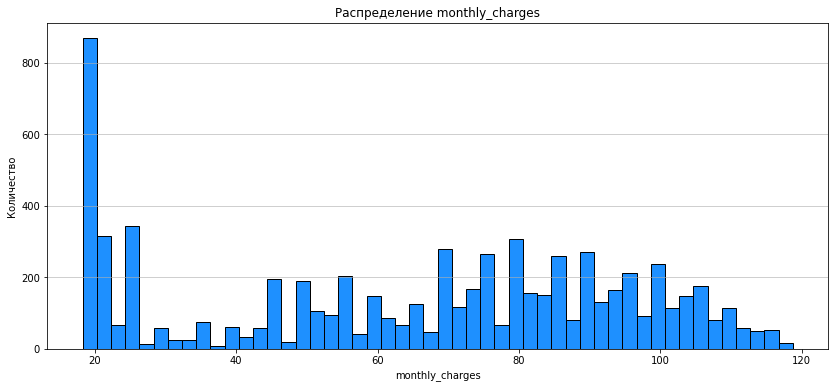

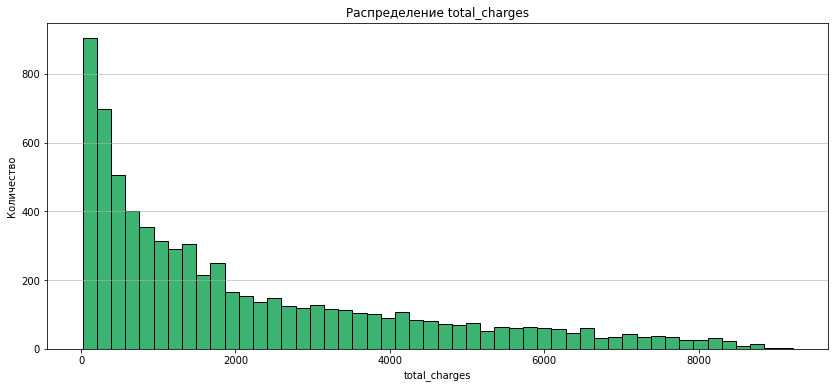

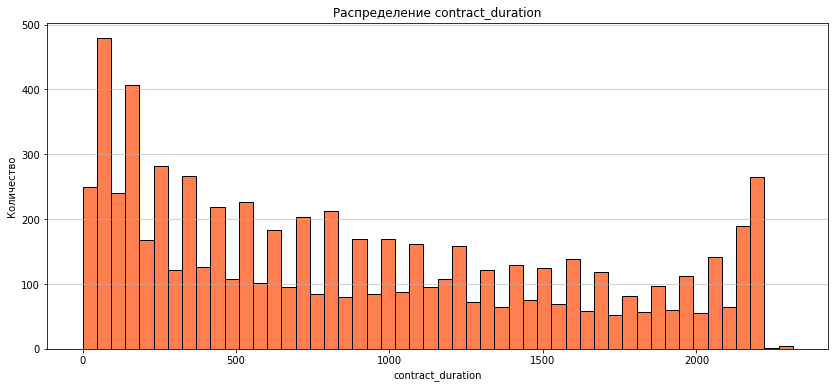

In [37]:
def hist(data, column, color):
    plt.figure(figsize=(14, 6))
    plt.hist(data[column], bins=50, color=color, edgecolor='black')
    plt.title('Распределение ' + column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

hist(data, 'monthly_charges', 'dodgerblue')
hist(data, 'total_charges', 'mediumseagreen')
hist(data, 'contract_duration', 'coral')

<div style="border:solid green 2px; padding: 5px">
    
    у многих ежемесячные траты не превышают 25 у.е., по всей видимости используют самый базовый пакет услуг, 
    а из разряда общих трат большая часть тратит примерно до 500 у.е.
    
    по длительности контракта заметим, как постепенно общая длительность угасает, есть смысл делать скидки для "старичков"
        
    также интересно будет посмотреть данные признаки на "ящиках с усами":

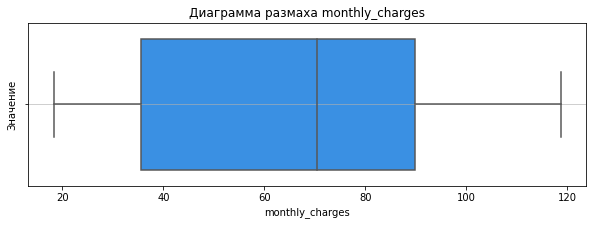

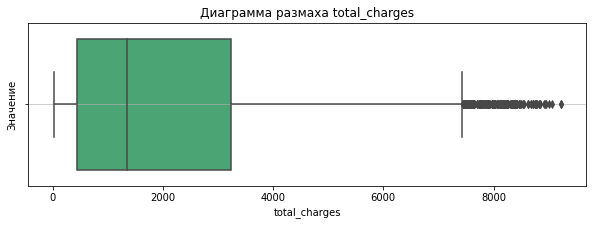

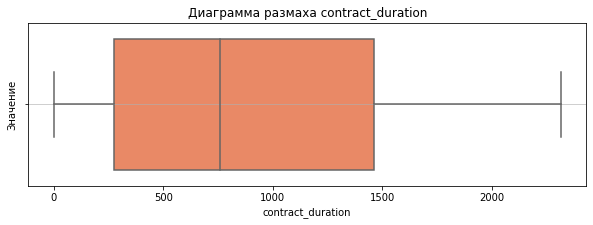

In [38]:
def boxplot(data, column, color):
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=data[column], color=color)
    plt.title('Диаграмма размаха ' + column)
    plt.xlabel(column)
    plt.ylabel('Значение')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

boxplot(data, 'monthly_charges', 'dodgerblue')
boxplot(data, 'total_charges', 'mediumseagreen')
boxplot(data, 'contract_duration', 'coral')

<div style="border:solid green 2px; padding: 5px">
    
    в общих тратах видим много выбросов - это те самые преданные пользователи, 
    которые пользуются услугами компании очень продолжительное время
    
    по длительности контрактов видим перекос в меньшую сторону
    
    проведём корреляционный анализ признаков методом Phi_K:

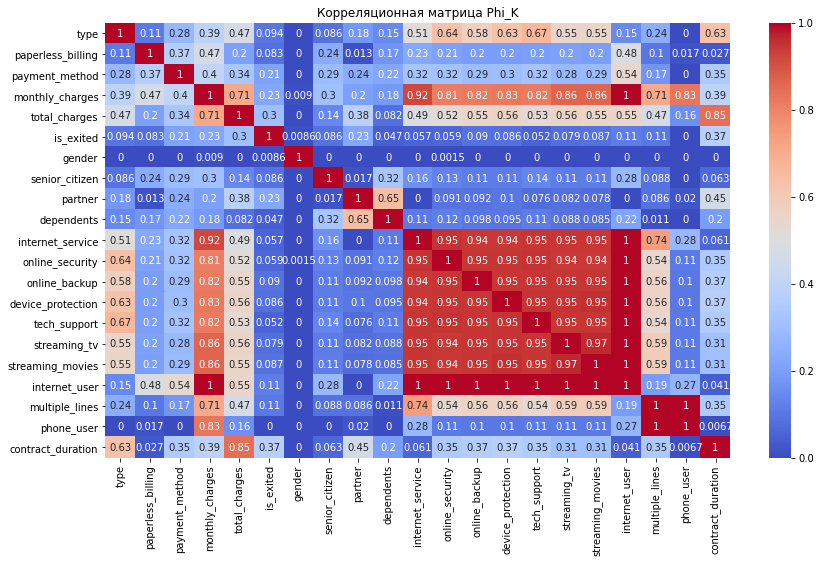

In [39]:
data_corr = data.drop(['customer_id', 'begin_date', 'end_date'], axis=1)
interval_columns = ['monthly_charges', 'total_charges', 'contract_duration']

correlation_matrix = phik_matrix(data_corr, interval_columns)

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица Phi_K')
plt.show()

<div style="border:solid green 2px; padding: 5px">
    
    что можем наблюдать: streaming_tv и streaming_movies имеют схожую корреляцию, пол (gender) практически 
    ни с чем не коррелирует;
    
    видим высокую корреляцию среди ежемесячных трат ('monthly_charges') и общих трат ('total_charges') 
    с остальными признаками;
    
    нужный нам признак, является ли абонент действующим или нет ('is_exited'), коррелируется более менее (> 0.2) 
    с признаками: 'payment_method', 'monthly_charges', 'total_charges', 'partner', 'contract_duration'; 
    данные признаки помогут нам лучше спрогнозировать возможный разрыв контракта

<div style="border:solid green 3px; padding: 15px"> 

# Промежуточный вывод:
    

1. Объединили предобработанные файлы в один по столбцу 'customer_id';
    
2. Предобработали объединённый файл;

3. При помощи гистограмм визуализировали распределение и соотношения признаков;

4. При помощи диаграмм размаха визуализировали траты пользователей;

5. Провели корреляционный анализ, сделали выводы.


## Подготовка данных

<div style="border:solid green 2px; padding: 5px">
    
    начинаем подготовку данных для обучения модели, сохраним требуемые столбцы в переменные, 
    разделим их на количественные, категориальные и общие:

In [40]:
act_cols =      ['payment_method', 
                 'partner',
                 'monthly_charges',
                 'total_charges',
                 'contract_duration',
                'internet_user',
                'multiple_lines',
                'online_backup']

cat_col_names = ['payment_method', 
                 'partner',
                'internet_user',
                'multiple_lines',
                'online_backup',]

num_col_names = ['monthly_charges',
                 'total_charges',
                'contract_duration']

<div style="border:solid green 2px; padding: 5px">
    
    сохраняем X и y с нужными столбцами, делим на три выборки - тренировочный, тестовый и валидационный;
    при помощи stratify количественно уравновешиваем целевой признак в выборках:

In [41]:
X = data[act_cols]
y = data['is_exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y)

<div style="border:solid green 2px; padding: 5px">
    
    проводим кодирование и масштабирование выборок, сохраняем в переменные:

In [42]:
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
scaler = StandardScaler()

X_train_encoded = encoder.fit_transform(X_train[cat_col_names])
X_test_encoded = encoder.transform(X_test[cat_col_names])

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_final = pd.concat([pd.DataFrame(X_train_encoded), pd.DataFrame(X_train_scaled, columns=num_col_names)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_encoded), pd.DataFrame(X_test_scaled, columns=num_col_names)], axis=1)

X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

<div style="border:solid green 2px; padding: 5px">
    
    подготовка данных выполнена, время обучить модели машинного обучения:

## Обучение моделей машинного обучения

<div style="border:solid green 2px; padding: 5px"> 

    при помощи GridSearchCV определим наилучшие гиперпараметры и обучим модель LogisticRegression:

In [43]:
%%time

threshold = 0.5
y_train_binary = (y_train >= threshold).astype(int)

lr = LogisticRegression(random_state=RANDOM_STATE)

pipeline = Pipeline([
    ('lr', lr)
])

param_grid = {
    'lr__C': [0.1, 1, 10, 100],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear']
}

grid_search_lr = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', error_score='raise')
grid_search_lr.fit(X_train_final, y_train_binary)

best_params = grid_search_lr.best_params_

print('Наилучшие параметры модели LogisticRegression:', best_params)
print(f'Качество модели по кросс-валидации: {grid_search_lr.best_score_}')

# Наилучшие параметры модели RandomForestClassifier: 
# {'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}

Наилучшие параметры модели LogisticRegression: {'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Качество модели по кросс-валидации: 0.7316294389825094
CPU times: user 5.58 s, sys: 2.77 s, total: 8.34 s
Wall time: 8.36 s


<div style="border:solid green 2px; padding: 5px"> 
    
    при помощи GridSearchCV определим наилучшие гиперпараметры и обучим модель RandomForestClassifier:

In [44]:
%%time

rf = RandomForestClassifier(random_state=RANDOM_STATE)

pipeline = Pipeline([
    ('rf', rf)
])

param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [5, 10],
    'rf__min_samples_split': [2, 3],
    'rf__min_samples_leaf': [2, 3]
}

grid_search_rf = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train_final, y_train_binary)

best_params = grid_search_rf.best_params_

print('Наилучшие параметры модели RandomForestClassifier:', best_params)
print(f'Качество модели по кросс-валидации: {grid_search_rf.best_score_}')

# Наилучшие параметры модели RandomForestClassifier: 
# {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

Наилучшие параметры модели RandomForestClassifier: {'rf__max_depth': 5, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Качество модели по кросс-валидации: 0.7985991868139783
CPU times: user 19.3 s, sys: 0 ns, total: 19.3 s
Wall time: 19.3 s


<div style="border:solid green 2px; padding: 5px"> 
    
    при помощи GridSearchCV определим наилучшие гиперпараметры и обучим модель CatBoostClassifier:


In [45]:
%%time

cb = CatBoostClassifier(loss_function="Logloss", verbose=False, random_state=RANDOM_STATE)

pipeline = Pipeline([
    ('cb', cb)
])

param_grid = {
    'cb__learning_rate': [0.1, 1],
    'cb__iterations': [5, 10]
}

grid_search_cb = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search_cb.fit(X_train_final, y_train_binary)

best_params = grid_search_cb.best_params_

print('Наилучшие параметры модели CatBoostClassifier:', best_params)
print(f'Качество модели по кросс-валидации: {grid_search_cb.best_score_}')

# Лучшие параметры модели CatBoostClassifier: {'cb__iterations': 10, 'cb__learning_rate': 1}

Наилучшие параметры модели CatBoostClassifier: {'cb__iterations': 10, 'cb__learning_rate': 1}
Качество модели по кросс-валидации: 0.7935717135467135
CPU times: user 469 ms, sys: 42.7 ms, total: 512 ms
Wall time: 8.25 s


<div style="border:solid green 2px; padding: 5px"> 
    
    при помощи GridSearchCV определим наилучшие гиперпараметры и обучим модель LGBMClassifier:

In [46]:
%%time

lg = lgb.LGBMClassifier(random_state=RANDOM_STATE)

param_grid = {
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'boosting_type': ['gbdt'],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [10, 15],
    'max_depth': [3, 5],
    'n_estimators': [500, 1000],
#    'num_threads': [1]
}

grid_search_lg = GridSearchCV(lg, param_grid, cv=5, scoring='roc_auc')
grid_search_lg.fit(X_train_final, y_train_binary)

best_params = grid_search_lg.best_params_

print('Наилучшие параметры модели LGBMClassifier:', best_params)
print(f'Качество модели по кросс-валидации: {grid_search_lg.best_score_}')

# Наилучшие параметры модели LGBMClassifier: {'lg__boosting_type': 'gbdt', 'lg__learning_rate': 0.1, 
#'lg__max_depth': 5, 'lg__metric': 'binary_logloss', 'lg__num_leaves': 15, 'lg__objective': 'binary'}

Наилучшие параметры модели LGBMClassifier: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 3, 'metric': 'binary_logloss', 'n_estimators': 1000, 'num_leaves': 10, 'objective': 'binary'}
Качество модели по кросс-валидации: 0.8821702862893199
CPU times: user 2min 48s, sys: 1.26 s, total: 2min 49s
Wall time: 2min 52s


<div style="border:solid green 2px; padding: 5px"> 
    
    теперь сравним roc_auc всех моделей вместе:

In [47]:
print(f'Качество модели LogisticRegression по кросс-валидации: {grid_search_lr.best_score_}')
print(f'Качество модели RandomForestClassifier по кросс-валидации: {grid_search_rf.best_score_}')
print(f'Качество модели CatBoostClassifier по кросс-валидации: {grid_search_cb.best_score_}')
print(f'Качество модели LGBMClassifier по кросс-валидации: {grid_search_lg.best_score_}')

Качество модели LogisticRegression по кросс-валидации: 0.7316294389825094
Качество модели RandomForestClassifier по кросс-валидации: 0.7985991868139783
Качество модели CatBoostClassifier по кросс-валидации: 0.7935717135467135
Качество модели LGBMClassifier по кросс-валидации: 0.8821702862893199


<div style="border:solid green 2px; padding: 5px"> 
    
    видим, что LGBMClassifier единственная набравшая по качеству метрики > 0.85, 
    данную модель будем испытывать на тестовой выборке

<div style="border:solid green 3px; padding: 15px"> 

# Промежуточный вывод:
    
1. выделили признаки, сохранили в переменные;
2. разбили данные на 2 выборки;
3. провели кодирование и масштабирование признаков;
4. обучили 4 различные модели на наилучших гиперпараметрах;
5. выбрали наилучшую модель исходя из лучшего показателя roc_auc_score.

## Проверка лучшей модели

<div style="border:solid green 2px; padding: 5px"> 
    
    проверяем точность нашей наилучшей модели на тестовой выборке:

In [48]:
y_test_binary = (y_test >= threshold).astype(int)

y_pred_test = grid_search_lg.predict_proba(X_test_final)[:, 1]
roc_auc_test = roc_auc_score(y_test_binary, y_pred_test)

print('Точность модели LGBMClassifier на тестовых данных:', roc_auc_test)

Точность модели LGBMClassifier на тестовых данных: 0.9131542885109507


<div style="border:solid green 2px; padding: 5px"> 
    
    получили 91.31% на метрике ROC_AUC, посмотрим метрику качества Accuracy:

In [49]:
accuracy = accuracy_score(y_test_binary, y_pred_test.round())
print(accuracy)

0.9273140261215219


<div style="border:solid green 2px; padding: 5px"> 
    
    метрика accuracy достигает 0.927, что не может не радовать

<div style="border:solid green 2px; padding: 5px"> 
    
    построим ROC-кривую итоговой модели:

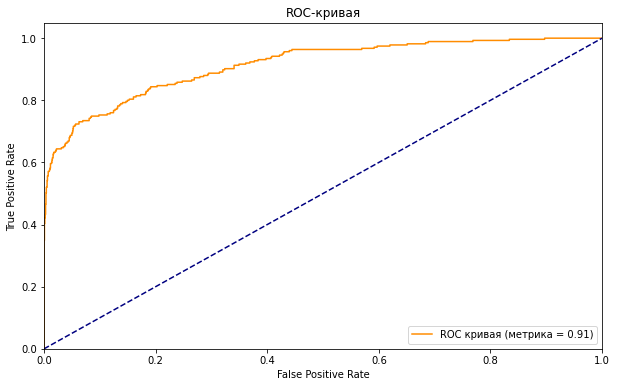

In [50]:
fpr, tpr, threshold = roc_curve(y_test_binary, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (метрика = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

<div style="border:solid green 2px; padding: 5px"> 
    
    проверка лучшей модели на тестовых данных достигла результата 91.31%, 
    построим матрицу ошибок, она даёт понимание, как ошибается модель, что именно она предсказывает верно и неверно,
    различая четыре вида предсказаний модели - True Positive, True Negative, False Positive и False Negative:

В матрице по очереди указаны значения TN, FN, FP и TP:


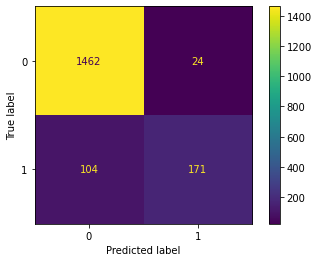

In [51]:
print('В матрице по очереди указаны значения TN, FN, FP и TP:')
ConfusionMatrixDisplay.from_estimator(grid_search_lg, X_test_final, y_test_binary);

<div style="border:solid green 2px; padding: 5px"> 
    
    True Negative - 1462 из 1566 (93.35%) - абоненты, остающиеся активными, верно предсказанные моделью;
    False Negative - 104 из 1566 (6.65%) - абоненты, остающиеся активными, НЕверно предсказанные моделью;
    True Positive - 171 из 195 (87.69%) - абоненты, разорвавшие контракт, верно предсказанные моделью;
    False Positive - 24 из 195 (12.31%) - абоненты, разорвавшие контракт, НЕверно предсказанные моделью;
    
    теперь можно посмотреть на важность признаков:

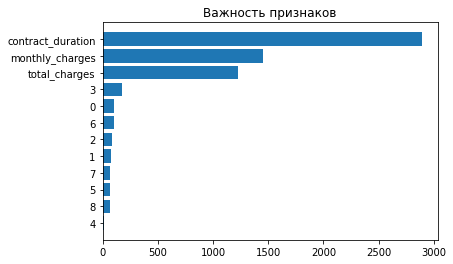

In [52]:
importances = grid_search_lg.best_estimator_.feature_importances_

plt.figure()
plt.title('Важность признаков')
indices = np.argsort(importances)[::-1]
plt.barh(range(X_train_final.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train_final.shape[1]), np.array(X_train_final.columns)[indices])
plt.ylim([-1, X_train_final.shape[1]])
plt.gca().invert_yaxis()
plt.show()

<div style="border:solid green 2px; padding: 5px"> 
    
    видим, что траты и длительность контракта играют существенную роль в решении абонентов сохранять контракт 
    или расторгнуть

## Общий вывод и рекомендации заказчику

<div style="border:solid green 4px; padding: 15px"> 

# Итоговый вывод:
    
1. Провели подготовку данных:
    
    а) Обновили scikit-learn, подгрузили необходимые библиотеки;
    
    б) Изучили файлы, провели предобработку;
    
    в) Добавили признаки, которые помогут в обучении моделей;
    
2. Провели объединение и анализ файла:
    
    а) Объединили файлы в один по общему признаку;
    
    б) Визуализировали признаки при помощи гистограмм и "ящиков с усами";
    
    в) Провели корреляционный анализ и сделали вывод;

3. Провели подготовку данных и обучение моделей:

    а) Выделили признаки и сохранили в переменные;
    
    б) Разбили данные на выборки, обработали признаки;
    
    в) Обучили 4 модели и выбрали лучшую из них;
    
4. Дополнительно проверили лучшую модель:

    а) Подтвердили высокий результат метрик AUC_ROC и Accuracy на тестовых данных;
    
    б) Визуализировали при помощи ROC-кривой и матрицы ошибок предсказанные значения;
    
    в) Вывели важность признаков и проанализировали значения;

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">

# ЗАКЛЮЧЕНИЕ: 

Заказчиком была поставлена задача создать модель, которая будет прогнозировать вероятность расторжения контракта абонентов; для решения этой задачи было привлечено 4 модели: LogisticRegression, RandomForestClassifier, CatBoostClassifier, LGBMClassifier. 
    
Наилучшее значение по кросс-валидации показала модель LGBMClassifier со значением метрики AUC_ROC 0.882, а затем подтвердившая результат на тестовой выборке со значением AUC_ROC 0.913, при этом значение метрики Accuracy на тестовой выборке также показало высокое значение 0.927. 
    
При обучении модели использовался RANDOM_STATE = 60524, были использованы наиболее весомые признаки исходя из корреляционной матрицы: 'payment_method', 'partner', 'monthly_charges', 'total_charges', 'contract_duration', 'internet_user', 'multiple_lines', 'online_backup', из них длительность контракта ('contract_duration') и пользователь интернета ('internet_user') были добавлены в результате предобработки признаков. 
    
Из всего вышесказанного рекомендуется использовать заказчику модель LGBMClassifier для решения задач прогнозирования оттока абонентов.